In [1]:
import matplotlib.pyplot as plt
import numpy as np
from threshold import * 
from calibration import calibrate
from transform import *
from lane_detection import * 
import cv2
import glob
#%matplotlib qt4 
%matplotlib inline
%config InlineBackend.figure_format='retina'

1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

In [2]:
mtx, dist = calibrate()
ksize = 3

In [163]:
image = cv2.imread('./test_images/test4.jpg')
undist = cv2.undistort(image, mtx, dist, None, mtx)

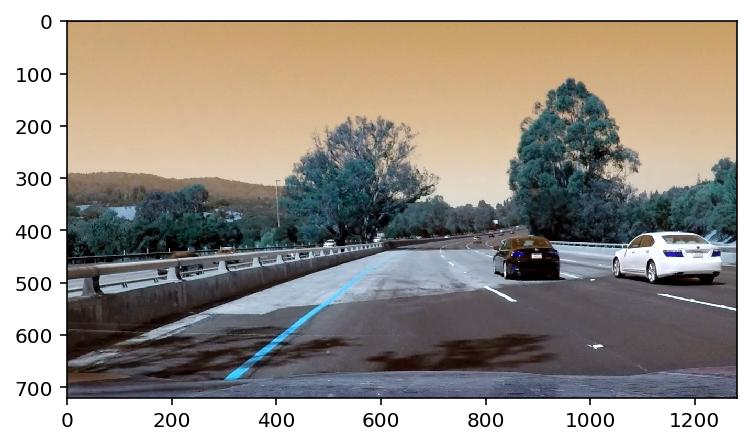

In [164]:
plt.imshow(image)

In [165]:
hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)

In [166]:
cv2.imshow("hello", hls)

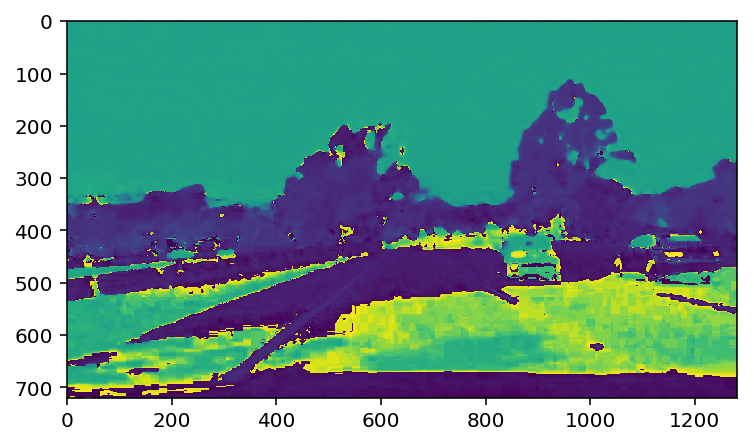

In [167]:
plt.imshow(hls[:,:,0])

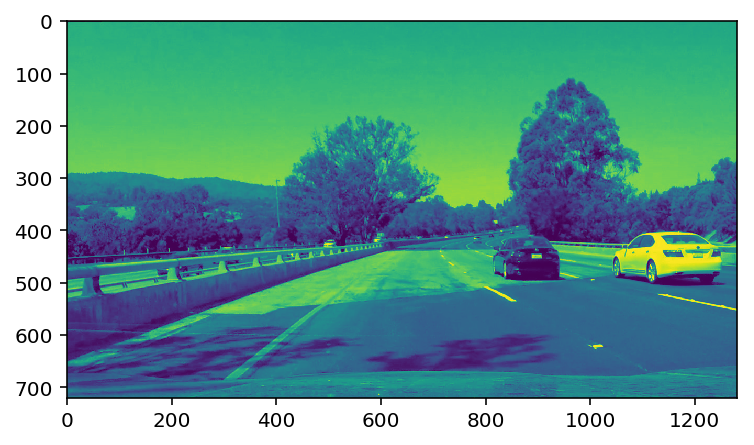

In [168]:
plt.imshow(hls[:,:,1])

In [156]:
sobelx = abs_sobel_thresh(undist, orient='x', sobel_kernel=3, thresh=[10,255])

0
255


In [157]:
sobely = abs_sobel_thresh(undist, orient='y', sobel_kernel=3, thresh=[10,255])

0
255


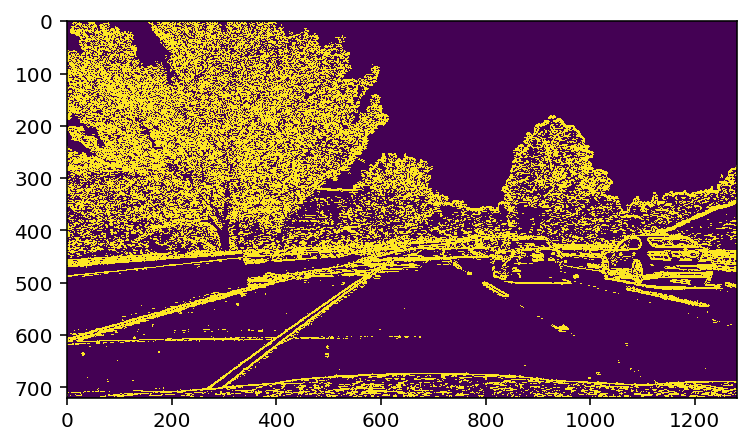

In [171]:
plt.imshow(sobely)

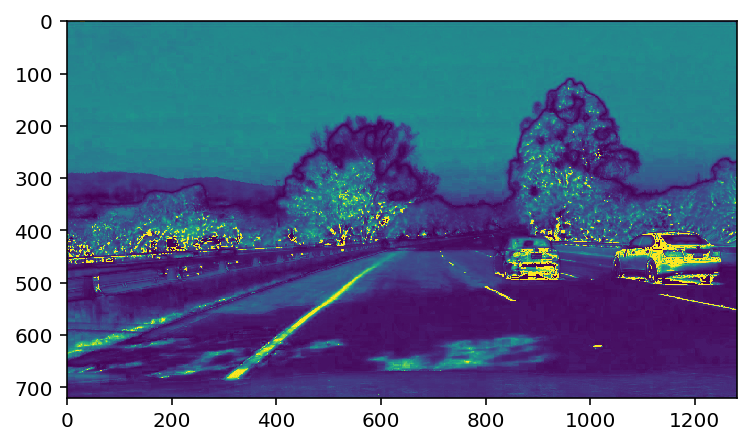

In [169]:
plt.imshow(hls[:,:,2])

In [160]:
cv2.destroyAllWindows()

In [161]:
hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
S = hls[:,:,2]
L = hls[:,:,1]

light_mask = np.zeros_like(L)
light_mask[(S >= 100) & (L >= 20)] = 1

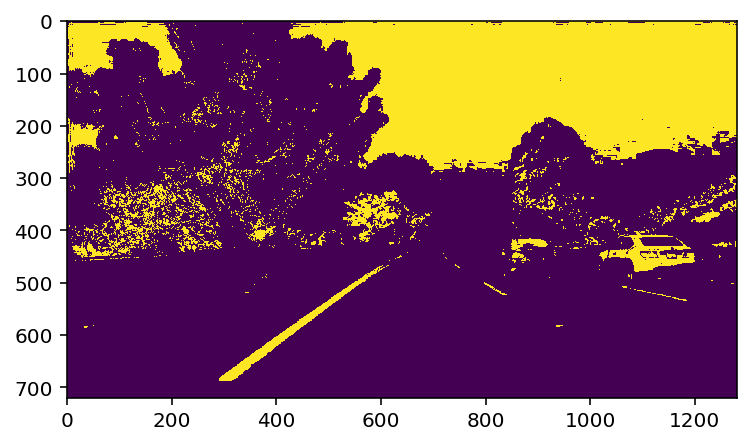

In [162]:
plt.imshow(light_mask)

In [67]:
s_binary = s_thresh(undist)
m, warped, minv = warp_image(s_binary)

In [68]:
r_binary = r_thresh(undist, thresh=(100,150))

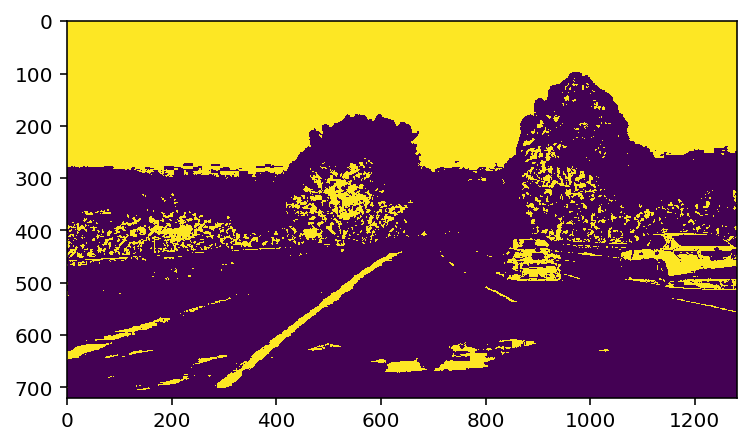

In [70]:
plt.imshow(s_binary)

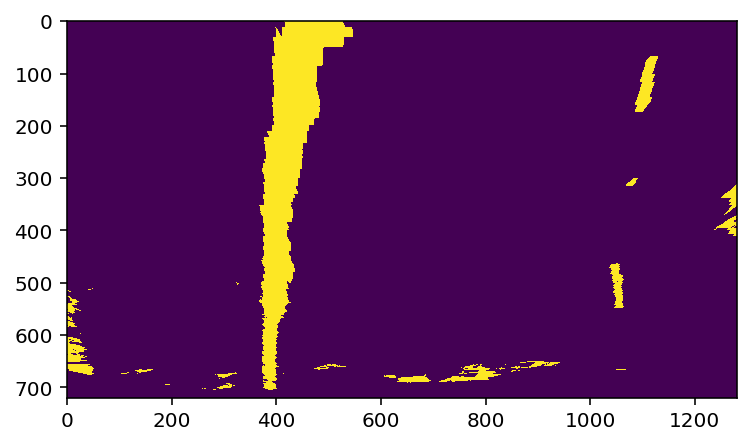

In [71]:
plt.imshow(warped)

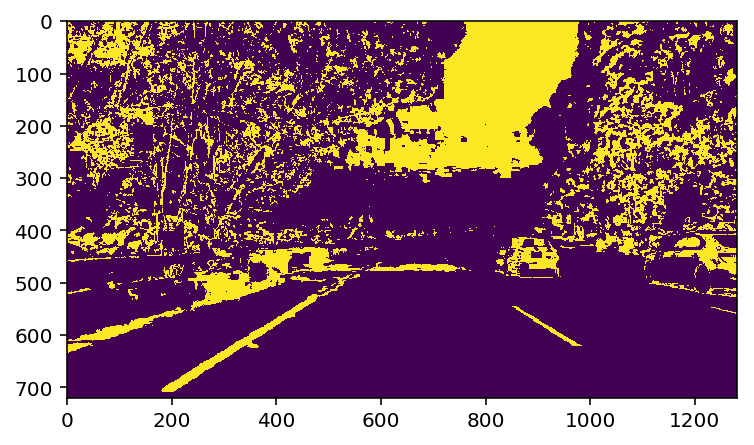

In [53]:
plt.imshow(np.uint8(s_binary))

ValueError: setting an array element with a sequence.

0
255


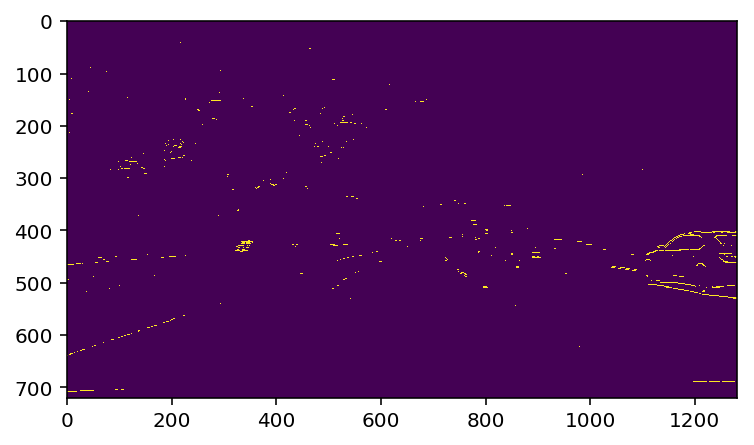

In [25]:
undist = cv2.undistort(image, mtx, dist, None, mtx)
# gradient thresholding
grady = abs_sobel_thresh(undist, orient='y', sobel_kernel=ksize, thresh=(100, 200))
plt.imshow(grady)

In [40]:
def process_image(image, mtx, dist, ksize):
    undist = cv2.undistort(image, mtx, dist, None, mtx)
    # gradient thresholding
    #gradx = abs_sobel_thresh(undist, orient='x', sobel_kernel=ksize, thresh=(100, 200))
    #grady = abs_sobel_thresh(undist, orient='y', sobel_kernel=ksize, thresh=(100, 200))
    #mag_binary = mag_thresh(undist, sobel_kernel=ksize, mag_thresh=(100, 200))
    #dir_binary = dir_threshold(undist, sobel_kernel=ksize, thresh=(0.7, 1.3))
    # color thresholding
    s_binary = s_thresh(undist)
    #r_binary = r_thresh(undist)
    # combine thresholds
    #combined = combine_thresholds(gradx, grady, mag_binary, dir_binary, s_binary, r_binary)
    #plt.imshow(combined)
    #return None
    # perspective transform 
    M, warped, Minv =  warp_image(combined)
    # detect lane lines
    left_fitx, right_fitx, ploty = detect_lane(warped)
    # project detected lane line on undistorted source image
    final = draw_lane(undist, warped, Minv, left_fitx, right_fitx, ploty)
    return final

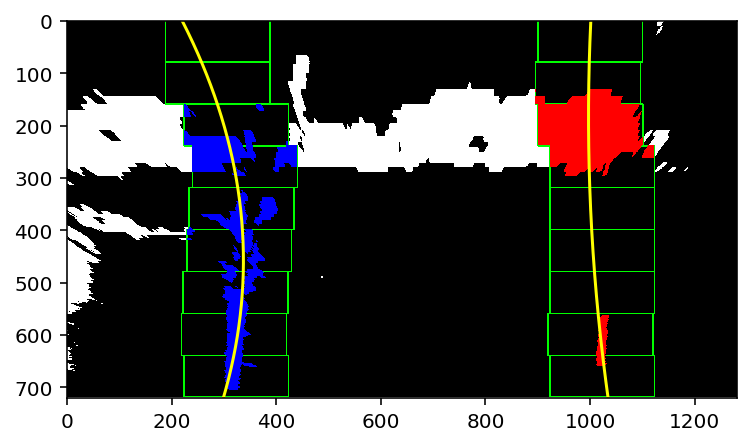

In [41]:
proc = process_image(image, mtx, dist, ksize)
rgb = cv2.cvtColor(proc, cv2.COLOR_BGR2RGB)

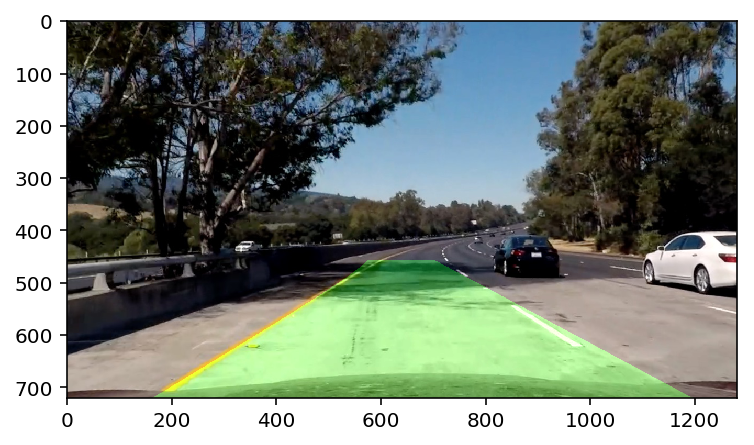

In [6]:
plt.imshow(rgb)

2. Apply a distortion correction to raw images.

In [7]:
binary_warped = proc

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# Generate some fake data to represent lane-line pixels
ploty = np.linspace(0, 719, num=720)# to cover same y-range as image
quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                              for y in ploty])
rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
                                for y in ploty])

leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
rightx = rightx[::-1]  # Reverse to match top-to-bottom in y

In [9]:
y_eval = np.max(ploty)

# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m

528.684372268 m 589.971141056 m
